In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import wrangle
import sklearn
import evaluate

## 1. Load your zillow dataset

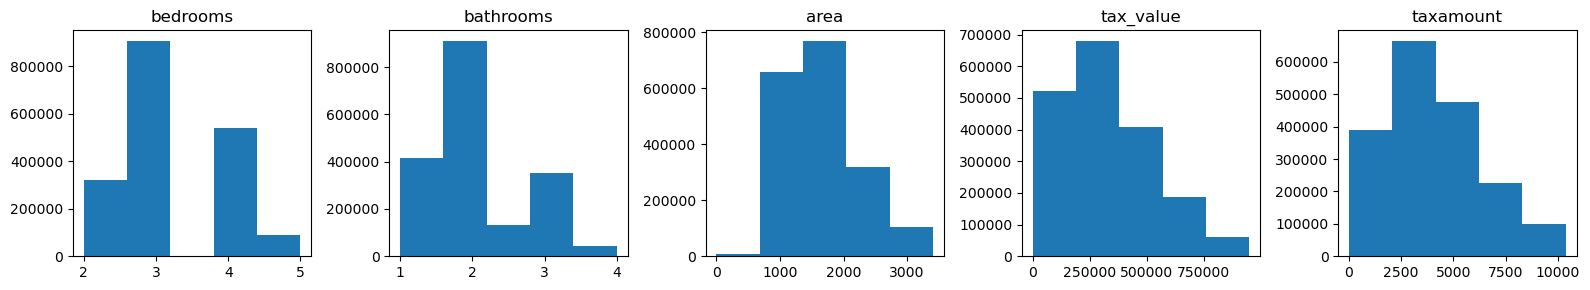

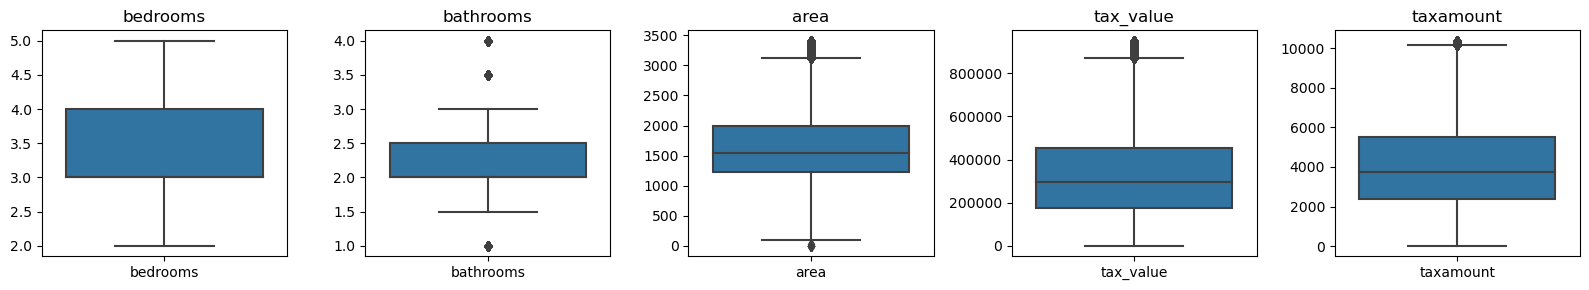

(         bedrooms  bathrooms    area  tax_value  year_built  taxamount    fips
 10057         4.0        2.0  1561.0   248240.0      1973.0    2504.40  6059.0
 2004970       3.0        2.0  1770.0    88390.0      1960.0    1671.93  6037.0
 306031        2.0        1.0  1452.0    81169.0      1946.0    1310.88  6037.0
 1038595       3.0        1.0  1000.0   119174.0      1950.0    1900.28  6037.0
 270959        3.0        2.0  1974.0   432268.0      1988.0    5315.27  6037.0,
          bedrooms  bathrooms    area  tax_value  year_built  taxamount    fips
 1214919       3.0        2.0  1727.0    73516.0      1964.0    1147.78  6059.0
 1799488       2.0        1.0  1516.0   408323.0      1947.0    4510.02  6037.0
 1799140       3.0        2.0  1550.0   219939.0      1947.0    2684.01  6037.0
 1099916       3.0        2.0  1075.0   308588.0      1957.0    3863.43  6037.0
 1534223       3.0        2.0  1548.0   181994.0      1949.0    2359.42  6037.0,
          bedrooms  bathrooms    area 

In [13]:
train, validate, test = wrangle.wrangle_zillow()
train.head(), validate.head(), test.head()

In [14]:
train.head(), validate.head(), test.head()

(         bedrooms  bathrooms    area  tax_value  year_built  taxamount    fips
 10057         4.0        2.0  1561.0   248240.0      1973.0    2504.40  6059.0
 2004970       3.0        2.0  1770.0    88390.0      1960.0    1671.93  6037.0
 306031        2.0        1.0  1452.0    81169.0      1946.0    1310.88  6037.0
 1038595       3.0        1.0  1000.0   119174.0      1950.0    1900.28  6037.0
 270959        3.0        2.0  1974.0   432268.0      1988.0    5315.27  6037.0,
          bedrooms  bathrooms    area  tax_value  year_built  taxamount    fips
 1214919       3.0        2.0  1727.0    73516.0      1964.0    1147.78  6059.0
 1799488       2.0        1.0  1516.0   408323.0      1947.0    4510.02  6037.0
 1799140       3.0        2.0  1550.0   219939.0      1947.0    2684.01  6037.0
 1099916       3.0        2.0  1075.0   308588.0      1957.0    3863.43  6037.0
 1534223       3.0        2.0  1548.0   181994.0      1949.0    2359.42  6037.0,
          bedrooms  bathrooms    area 

In [15]:
train_sample = train.sample(int(len(train) * 0.001))
validate_sample = validate.sample(int(len(validate) * 0.001))
test_sample = test.sample(int(len(test) * 0.001))

## 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

In [19]:
def scale(train, validate, test):
    '''
    Takes in a train, validate, test and returns the dataframes,
    but scaled using the 'StandardScaler()'
    '''
    scale_cols = ['bedrooms',
              'bathrooms',
              'area',
              'taxamount']
    scaler = sklearn.preprocessing.StandardScaler()
    scaler.fit(train[scale_cols])
    train[scale_cols] = scaler.transform(train[scale_cols])
    scaler.fit(validate[scale_cols])
    validate[scale_cols] = scaler.transform(validate[scale_cols])
    scaler.fit(test[scale_cols])
    test[scale_cols] = scaler.transform(test[scale_cols])
    return train, validate, test

In [23]:
train_sample_scaled, validate_sample_scaled, test_sample_scaled = scale(train_sample, validate_sample, test_sample)
train_sample_scaled['baseline'] = round(train_sample_scaled.tax_value.mean(), 0)
train_sample_scaled.sample()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,baseline
1990706,-1.536945,0.011496,-0.235939,291636.0,1971.0,-0.430184,6059.0,315338.0


In [24]:
x_cols = [
    'area'
]
y_cols = [
    'tax_value'
]

In [25]:
lm = LinearRegression()

# Fit the thing
lm.fit(train_sample_scaled[x_cols], train_sample_scaled[y_cols])

# Use the thing
train_sample_scaled['yhat'] = np.round(lm.predict(train_sample_scaled[x_cols]))

In [26]:
train_sample_scaled.sample()


,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,baseline,yhat
96332,1.038275,1.41536,1.151399,685430.0,1999.0,2.485881,6059.0,315338.0,408614.0


## 3. Plot the residuals for the linear regression model that you made.



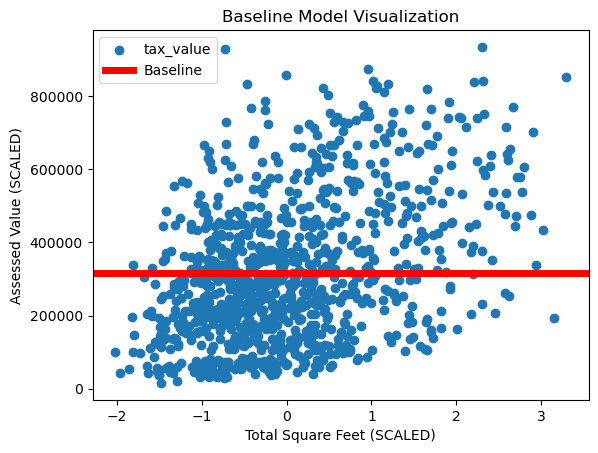

In [29]:
plt.scatter(data=train_sample_scaled, x='area', y='tax_value')
plt.axhline(train_sample_scaled.tax_value.mean(), color='red', linewidth=5, label='Baseline')
plt.title('Baseline Model Visualization')
plt.xlabel('Total Square Feet (SCALED)')
plt.ylabel('Assessed Value (SCALED)')
plt.legend()
plt.show()

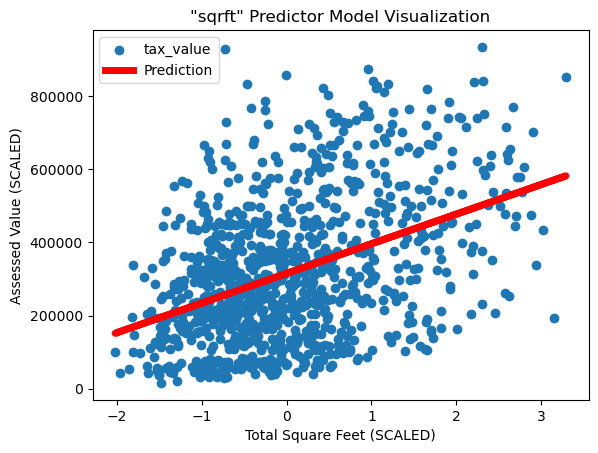

In [30]:
plt.scatter(data=train_sample_scaled, x='area', y='tax_value')
plt.plot(train_sample_scaled[x_cols], train_sample_scaled['yhat'], color='red', linewidth=5, label='Prediction')
plt.title('"sqrft" Predictor Model Visualization')
plt.xlabel('Total Square Feet (SCALED)')
plt.ylabel('Assessed Value (SCALED)')
plt.legend()
plt.show()

## 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [33]:
evaluate.get_eval_stats(train_sample_scaled, 'tax_value', 'baseline', 'yhat')

===== baseline =====
SSE: 38373737741447.64
ESS: 38373737741635.00
TSS: 76747475483082.64
MSE: 36968918826.06
RMSE: 192273.03

===== yhat =====
SSE: 31561665447726.00
ESS: 31561665447726.00
TSS: 63123330895452.00
MSE: 30406228755.03
RMSE: 174373.82
R2: 0.18

===== yhat - baseline =====
SSE: -6812072293721.00
ESS: -6812072293909.00
TSS: -13624144587630.00
MSE: -6562690071.00
RMSE: -17899.00



## 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [34]:
evaluate.get_eval_stats(train_sample_scaled, 'tax_value', 'baseline', 'yhat')

===== baseline =====
SSE: 38373737741447.64
ESS: 38373737741635.00
TSS: 76747475483082.64
MSE: 36968918826.06
RMSE: 192273.03

===== yhat =====
SSE: 31561665447726.00
ESS: 31561665447726.00
TSS: 63123330895452.00
MSE: 30406228755.03
RMSE: 174373.82
R2: 0.18

===== yhat - baseline =====
SSE: -6812072293721.00
ESS: -6812072293909.00
TSS: -13624144587630.00
MSE: -6562690071.00
RMSE: -17899.00



## 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [35]:
evaluate.get_eval_stats(train_sample_scaled, 'tax_value', 'baseline', 'yhat')

===== baseline =====
SSE: 38373737741447.64
ESS: 38373737741635.00
TSS: 76747475483082.64
MSE: 36968918826.06
RMSE: 192273.03

===== yhat =====
SSE: 31561665447726.00
ESS: 31561665447726.00
TSS: 63123330895452.00
MSE: 30406228755.03
RMSE: 174373.82
R2: 0.18

===== yhat - baseline =====
SSE: -6812072293721.00
ESS: -6812072293909.00
TSS: -13624144587630.00
MSE: -6562690071.00
RMSE: -17899.00



## 7. What is the amount of variance explained in your model?

In [36]:
r2_score(train_sample_scaled.tax_value, train_sample_scaled.yhat)

0.17751912361572986

## 8. Is your model better than the baseline model?

#### Yes

## 9. Create a file named evaluate.py that contains the following functions.

* plot_residuals(y, yhat): creates a residual plot

* regression_errors(y, yhat): returns the following values:
    sum of squared errors (SSE)
    explained sum of squares (ESS)
    total sum of squares (TSS)
    mean squared error (MSE)
    root mean squared error (RMSE)
    
* baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model


* better_than_baseline(y, yhat): returns true if your model performs better than    the baseline, otherwise false

In [ ]:
def get_eval_stats(df, actual_col, baseline_col, prediction_col):
  
    baseline = df[actual_col].mean()
    base_residual = df[actual_col] - baseline
    pred_residual = df[actual_col] - df[prediction_col]
    SSE_base = (base_residual ** 2).sum()
    SSE_pred = (pred_residual ** 2).sum()
    SSE_diff = int(SSE_pred - SSE_base)
    ESS_base = sum((df[baseline_col] - df[actual_col]) ** 2)
    ESS_pred = sum((df[prediction_col] - df[actual_col]) ** 2)
    ESS_diff = int(ESS_pred - ESS_base)
    TSS_base = SSE_base + ESS_base
    TSS_pred = SSE_pred + ESS_pred
    TSS_diff = int(TSS_pred - TSS_base)
    MSE_base = SSE_base / len(df)
    MSE_pred = SSE_pred / len(df)
    MSE_diff = int(MSE_pred - MSE_base)
    RMSE_base = MSE_base ** .5
    RMSE_pred = MSE_pred ** .5
    RMSE_diff = int(RMSE_pred - RMSE_base)
    R2_base = 1 - (SSE_base/TSS_base)
    R2_pred = 1 - (SSE_pred/SSE_base)
    R2_diff = R2_pred - R2_base
    print(f'\033[35m===== {baseline_col} =====\033[0m\n\033[32mSSE:\033[0m {SSE_base:.2f}\n\033[32mESS:\033[0m {ESS_base:.2f}\n\033[32mTSS:\033[0m {TSS_base:.2f}\n\033[32mMSE:\033[0m {MSE_base:.2f}\n\033[32mRMSE:\033[0m {RMSE_base:.2f}\n')
    print(f'\033[35m===== {prediction_col} =====\033[0m\n\033[32mSSE:\033[0m {SSE_pred:.2f}\n\033[32mESS:\033[0m {ESS_pred:.2f}\n\033[32mTSS:\033[0m {TSS_pred:.2f}\n\033[32mMSE:\033[0m {MSE_pred:.2f}\n\033[32mRMSE:\033[0m {RMSE_pred:.2f}\n\033[32mR2:\033[0m {R2_pred:.2f}\n')
    print(f'\033[35m===== {prediction_col} - {baseline_col} =====\033[0m\n\033[32mSSE:\033[0m {SSE_diff:.2f}\n\033[32mESS:\033[0m {ESS_diff:.2f}\n\033[32mTSS:\033[0m {TSS_diff:.2f}\n\033[32mMSE:\033[0m {MSE_diff:.2f}\n\033[32mRMSE:\033[0m {RMSE_diff:.2f}\n')


def plot_residuals(y, yhat):
  
    residuals = y - yhat
    sns.scatterplot(x=yhat, y=residuals)
    plt.axhline(y=0, color='r', label='Actual Line')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals Plot')
    plt.legend()
    plt.show()


def regression_errors(y, yhat):
   
    residual = y - yhat
    SSE = sum((residual ** 2))
    ESS = sum((yhat - y) ** 2)
    TSS = SSE + ESS
    MSE = SSE / len(y)
    RMSE = MSE ** .5
    print(f'\033[32mSSE:\033[0m {SSE:.2f}\n\033[32mESS:\033[0m {ESS:.2f}\n\033[32mTSS:\033[0m {TSS:.2f}\n\033[32mMSE:\033[0m {MSE:.2f}\n\033[32mRMSE:\033[0m {RMSE:.2f}\n')


def baseline_mean_errors(y):
  
    baseline = y.mean()
    residual = y - baseline
    SSE = sum((residual ** 2))
    MSE = SSE / len(y)
    RMSE = MSE ** .5
    print(f'\033[32mSSE:\033[0m {SSE:.2f}\n\033[32mMSE:\033[0m {MSE:.2f}\n\033[32mRMSE:\033[0m {RMSE:.2f}\n')


def better_than_baseline(y, baseline, yhat):
  
    base_r2 = r2_score(y, baseline)
    pred_r2 = r2_score(y, yhat)
    if pred_r2 > base_r2:
        print(f'\033[32mBETTER THAN BASELINE!\033[0m: {(pred_r2 - base_r2):.4f}')
        print(f'Baseline: {base_r2:.4f}')
        print(f'Prediction: {pred_r2:.4f}')
    else:
        print(f'\00[31mWORSE THAN BASELINE!\033[0m: {(pred_r2 - base_r2):.4f}')
        print(f'Baseline: {base_r2:.4f}')
        print(f'Prediction: {pred_r2:.4f}')
